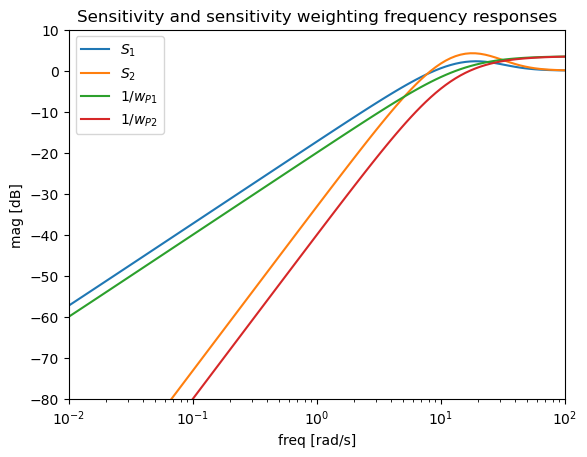

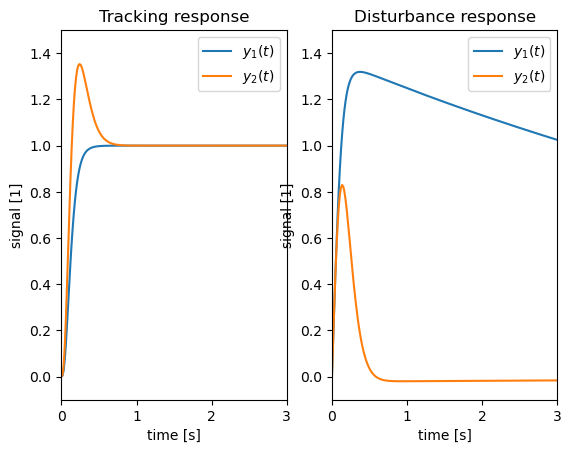

In [1]:
"""robust_siso.py

Demonstrate mixed-sensitivity H-infinity design for a SISO plant.

Based on Example 2.11 from Multivariable Feedback Control, Skogestad
and Postlethwaite, 1st Edition.
"""

import os

import numpy as np
import matplotlib.pyplot as plt

from control import tf, mixsyn, feedback, step_response

s = tf([1, 0], 1)
# the plant
g = 200/(10*s + 1) / (0.05*s + 1)**2
# disturbance plant
gd = 100/(10*s + 1)

# first design
# sensitivity weighting
M = 1.5
wb = 10
A = 1e-4
ws1 = (s/M + wb) / (s + wb*A)
# KS weighting
wu = tf(1, 1)

k1, cl1, info1 = mixsyn(g, ws1, wu)

# sensitivity (S) and complementary sensitivity (T) functions for
# design 1
s1 = feedback(1, g*k1)
t1 = feedback(g*k1, 1)

# second design
# this weighting differs from the text, where A**0.5 is used; if you use that,
# the frequency response doesn't match the figure.  The time responses
# are similar, though.
ws2 = (s/M ** 0.5 + wb)**2 / (s + wb*A)**2
# the KS weighting is the same as for the first design

k2, cl2, info2 = mixsyn(g, ws2, wu)

# S and T for design 2
s2 = feedback(1, g*k2)
t2 = feedback(g*k2, 1)

# frequency response
omega = np.logspace(-2, 2, 101)
ws1mag, _, _ = ws1.frequency_response(omega)
s1mag, _, _ = s1.frequency_response(omega)
ws2mag, _, _ = ws2.frequency_response(omega)
s2mag, _, _ = s2.frequency_response(omega)

plt.figure(1)
# text uses log-scaled absolute, but dB are probably more familiar to most control engineers
plt.semilogx(omega, 20*np.log10(s1mag.flat), label='$S_1$')
plt.semilogx(omega, 20*np.log10(s2mag.flat), label='$S_2$')
# -1 in logspace is inverse
plt.semilogx(omega, -20*np.log10(ws1mag.flat), label='$1/w_{P1}$')
plt.semilogx(omega, -20*np.log10(ws2mag.flat), label='$1/w_{P2}$')

plt.ylim([-80, 10])
plt.xlim([1e-2, 1e2])
plt.xlabel('freq [rad/s]')
plt.ylabel('mag [dB]')
plt.legend()
plt.title('Sensitivity and sensitivity weighting frequency responses')

# time response
time = np.linspace(0, 3, 201)
_, y1 = step_response(t1, time)
_, y2 = step_response(t2, time)

# gd injects into the output (that is, g and gd are summed), and the
# closed loop mapping from output disturbance->output is S.
_, y1d = step_response(s1*gd, time)
_, y2d = step_response(s2*gd, time)

plt.figure(2)
plt.subplot(1, 2, 1)
plt.plot(time, y1, label='$y_1(t)$')
plt.plot(time, y2, label='$y_2(t)$')

plt.ylim([-0.1, 1.5])
plt.xlim([0, 3])
plt.xlabel('time [s]')
plt.ylabel('signal [1]')
plt.legend()
plt.title('Tracking response')

plt.subplot(1, 2, 2)
plt.plot(time, y1d, label='$y_1(t)$')
plt.plot(time, y2d, label='$y_2(t)$')

plt.ylim([-0.1, 1.5])
plt.xlim([0, 3])
plt.xlabel('time [s]')
plt.ylabel('signal [1]')
plt.legend()
plt.title('Disturbance response')

if 'PYCONTROL_TEST_EXAMPLES' not in os.environ:
    plt.show()